# Step -1 : Data preprocessing

In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd

Using TensorFlow backend.


In [2]:
#Loading the data
data = pd.read_csv("url_data.csv.txt")

In [3]:
data.head()

,url,isMalicious
0,songlyrics.com/news/riffd-the-shins-heartworms,0
1,imaging-resource.com/PRODS/olympus-e-m1-ii/oly...,0
2,gosugamers.net/lol/streams,0
3,thingiverse.com/corkyzett/collections/intlwome...,0
4,bausch.com/our-products/contact-lens-care/spec...,0


In [5]:
data['isMalicious'].value_counts()

1    97399
0    97399
Name: isMalicious, dtype: int64

We need to split the data according to parts of the URL

A typical URL could have the form http://www.example.com/index.html, which indicates a protocol (http), a hostname (www.example.com), and a file name (index.html). And in this case we don't have a protocol name.

In [6]:
seperation_domain_name = data['url'].str.split("/",1,expand = True)
seperation_domain_name.head()

,0,1
0,songlyrics.com,news/riffd-the-shins-heartworms
1,imaging-resource.com,PRODS/olympus-e-m1-ii/olympus-e-m1-iiA.HTM
2,gosugamers.net,lol/streams
3,thingiverse.com,corkyzett/collections/intlwomensday
4,bausch.com,our-products/contact-lens-care/specialty-lens-...


In [7]:
seperation_domain_name.columns=["domain_name","address"]
seperation_domain_name.head()

,domain_name,address
0,songlyrics.com,news/riffd-the-shins-heartworms
1,imaging-resource.com,PRODS/olympus-e-m1-ii/olympus-e-m1-iiA.HTM
2,gosugamers.net,lol/streams
3,thingiverse.com,corkyzett/collections/intlwomensday
4,bausch.com,our-products/contact-lens-care/specialty-lens-...


In [8]:
seperation_domain_name['isMalicious'] = pd.Series(data['isMalicious'], index=seperation_domain_name.index)
seperation_domain_name

,domain_name,address,isMalicious
0,songlyrics.com,news/riffd-the-shins-heartworms,0
1,imaging-resource.com,PRODS/olympus-e-m1-ii/olympus-e-m1-iiA.HTM,0
2,gosugamers.net,lol/streams,0
3,thingiverse.com,corkyzett/collections/intlwomensday,0
4,bausch.com,our-products/contact-lens-care/specialty-lens-...,0
...,...,...,...
194793,spawash.gr,uban/dropbox/proposal/index.php,1
194794,formstack.com,forms/twtw13,1
194795,rooferexpert.com,css/8933617-dosar-nr-1817842015/394c-4735-8239...,1
194796,fc2.com,laygwvh8,1


In [9]:
pre_data = seperation_domain_name.copy()
type(pre_data)

pandas.core.frame.DataFrame

# Step -2 :Features Extraction

In [10]:
seperation_domain_name[seperation_domain_name['isMalicious']==1]

,domain_name,address,isMalicious
97399,at.ua,8/recovery,1
97400,giveitallhereqq.com,69.exe,1
97401,bget.ru,None,1
97402,shucksbr.com,files/impotsfr,1
97403,midnightgarage.net,trekimages/x574gmwxuo9ruyma,1
...,...,...,...
194793,spawash.gr,uban/dropbox/proposal/index.php,1
194794,formstack.com,forms/twtw13,1
194795,rooferexpert.com,css/8933617-dosar-nr-1817842015/394c-4735-8239...,1
194796,fc2.com,laygwvh8,1


**Feature-1**

1.Lenghth of the URL

(1)Long URL to Hide the Suspicious Part

In [11]:
pre_data['length'] = data['url'].apply(len)
pre_data.head()

,domain_name,address,isMalicious,length
0,songlyrics.com,news/riffd-the-shins-heartworms,0,46
1,imaging-resource.com,PRODS/olympus-e-m1-ii/olympus-e-m1-iiA.HTM,0,63
2,gosugamers.net,lol/streams,0,26
3,thingiverse.com,corkyzett/collections/intlwomensday,0,51
4,bausch.com,our-products/contact-lens-care/specialty-lens-...,0,70


In [12]:
pre_data['length'].value_counts(ascending=False)

26      4449
25      4193
30      4145
27      4099
31      4094
        ... 
1908       1
435        1
688        1
430        1
1023       1
Name: length, Length: 579, dtype: int64

In [13]:
pre_data['length'].value_counts(ascending=False)[0:100]

26     4449
25     4193
30     4145
27     4099
31     4094
       ... 
102     342
150     340
9       339
106     330
108     325
Name: length, Length: 100, dtype: int64

In [14]:
import matplotlib.pyplot as plt 

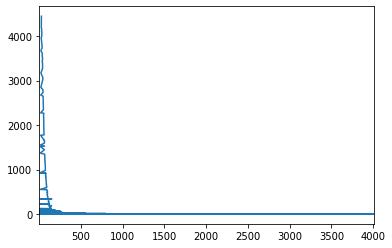

In [15]:
pre_data['length'].value_counts().plot()

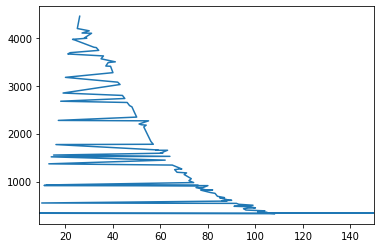

In [16]:
pre_data['length'].value_counts(ascending=False)[0:100].plot()

In [17]:
def long_url(l):
    l= str(l)
    """This function is defined in order to differntiate website based on the length of the URL"""
    if len(l) < 20:
        return 0
    elif len(l) <= 40:
        return 1
    elif len(l) <= 60:
        return 2
    elif len(l) <= 80:
        return 3
    elif len(l) <= 100:
        return 4
    return 5

In [18]:
pre_data['length'] = data['url'].apply(long_url)
pre_data.head()

,domain_name,address,isMalicious,length
0,songlyrics.com,news/riffd-the-shins-heartworms,0,2
1,imaging-resource.com,PRODS/olympus-e-m1-ii/olympus-e-m1-iiA.HTM,0,3
2,gosugamers.net,lol/streams,0,1
3,thingiverse.com,corkyzett/collections/intlwomensday,0,2
4,bausch.com,our-products/contact-lens-care/specialty-lens-...,0,3


In [19]:
pre_data['length'].value_counts()

1    79497
2    47203
3    23150
0    17270
5    16133
4    11545
Name: length, dtype: int64

(2) Others length

Domainlength:

In [20]:
#domainlength
pre_data['domain_length'] = pre_data['domain_name'].apply(len)
pre_data['domain_length'].value_counts()

12     17685
11     17247
13     17143
10     16889
14     14891
       ...  
75         1
80         1
81         1
124        1
126        1
Name: domain_length, Length: 98, dtype: int64

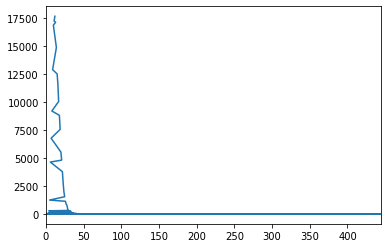

In [21]:
pre_data['domain_length'].value_counts().plot()

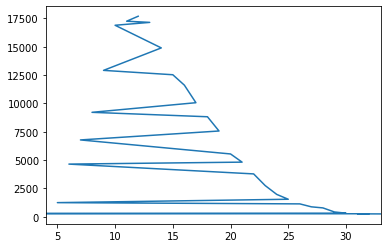

In [22]:
pre_data['domain_length'].value_counts(ascending=False)[0:30].plot()

In [23]:
def domain_len(l):
    l= str(l)
    if len(l) < 5:
        return 0
    elif len(l) <= 10:
        return 1
    elif len(l) <= 15:
        return 2
    elif len(l) <= 20:
        return 3
    elif len(l) <= 25:
        return 4
    return 5

In [24]:
pre_data['domain_length'] = pre_data['domain_name'].apply(domain_len)
pre_data['domain_length'].value_counts()

2    79490
1    51663
3    43578
4    14845
5     4846
0      376
Name: domain_length, dtype: int64

Filelength:

In [25]:
splited_data = data['url'].str.split("/")
splited_data.head()

0    [songlyrics.com, news, riffd-the-shins-heartwo...
1    [imaging-resource.com, PRODS, olympus-e-m1-ii,...
2                       [gosugamers.net, lol, streams]
3    [thingiverse.com, corkyzett, collections, intl...
4    [bausch.com, our-products, contact-lens-care, ...
Name: url, dtype: object

In [26]:
def file_len(l):
    return len(l[-1])

pre_data['file_length'] = splited_data.apply(file_len)
pre_data['file_length'].value_counts()

9      15373
8      12639
10     12450
7      11723
6      11011
       ...  
669        1
338        1
595        1
668        1
639        1
Name: file_length, Length: 491, dtype: int64

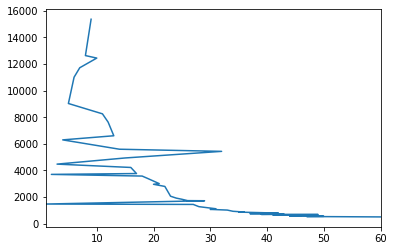

In [27]:
pre_data['file_length'].value_counts(ascending=False)[0:50].plot()

In [28]:
def file_len2(l):
    if len(l[-1])<10:
        return 0
    elif len(l[-1])<20:
        return 1
    elif len(l[-1])<30:
        return 2
    return 3

In [29]:
pre_data['file_length'] = splited_data.apply(file_len2)
pre_data['file_length'].value_counts()

0    75726
1    60408
3    37970
2    20694
Name: file_length, dtype: int64

The infomation of dictionary can be included in the total url length, domain length and file length

**Feature-2**

2.URL’s having specail Symbols

(1) Using “@” symbol in the URL leads the browser to ignore everything preceding the “@” symbol and the real address often follows the “@” symbol.

(2)The existence of “//” within the URL path means that the user will be redirected to another website. An example of such URL’s is: “http://www.legitimate.com//http://www.phishing.com”. We examine the location where the “//” appears. We find that if the URL starts with “HTTP”, that means the “//” should appear in the sixth position. However, if the URL employs “HTTPS” then the “//” should appear in seventh position.

(3)The dash symbol is rarely used in legitimate URLs. Phishers tend to add prefixes or suffixes separated by (-) to the domain name so that users feel that they are dealing with a legitimate webpage.

For example http://www.Confirme-paypal.com/.

(4)..

In [30]:
def have_at_symbol(l):
    """This function is used to check whether the URL contains @ symbol or not"""
    if "@" in str(l):
        return 1
    return 0

In [31]:
pre_data['having_at_symbol'] = data['url'].apply(have_at_symbol)
pre_data.head()

,domain_name,address,isMalicious,length,domain_length,file_length,having_at_symbol
0,songlyrics.com,news/riffd-the-shins-heartworms,0,2,2,2,0
1,imaging-resource.com,PRODS/olympus-e-m1-ii/olympus-e-m1-iiA.HTM,0,3,3,2,0
2,gosugamers.net,lol/streams,0,1,2,0,0
3,thingiverse.com,corkyzett/collections/intlwomensday,0,2,2,1,0
4,bausch.com,our-products/contact-lens-care/specialty-lens-...,0,3,1,2,0


In [32]:
pre_data['having_at_symbol'].value_counts()

0    192473
1      2325
Name: having_at_symbol, dtype: int64

In [33]:
def have_at_symbol(l):
    if "//" in str(l):
        return 1
    return 0
pre_data['having_at_symbol'] = data['url'].apply(have_at_symbol)

def have_line_symbol(l):
    if "-" in str(l):
        return 1
    return 0
pre_data['having_-_symbol'] = data['url'].apply(have_line_symbol)

def have___symbol(l):
    if "_" in str(l):
        return 1
    return 0
pre_data['having___symbol'] = data['url'].apply(have___symbol)

def have_sup_symbol(l):
    if "!" in str(l):
        return 1
    return 0
pre_data['having_!_symbol'] = data['url'].apply(have_sup_symbol)

def have_spa_symbol(l):
    if " " in str(l):
        return 1
    return 0
pre_data['having_ _symbol'] = data['url'].apply(have_spa_symbol)

def have_dol_symbol(l):
    if "$" in str(l):
        return 1
    return 0
pre_data['having_$_symbol'] = data['url'].apply(have_dol_symbol)

def have_per_symbol(l):
    if "%" in str(l):
        return 1
    return 0
pre_data['having_%_symbol'] = data['url'].apply(have_per_symbol)

def have_and_symbol(l):
    if "&" in str(l):
        return 1
    return 0
pre_data['having_&_symbol'] = data['url'].apply(have_and_symbol)

**Feature - 3**

3.Number of Sub-Domain and Multi Sub-Domains

The legitimate URL link has two dots in the URL since we can ignore typing “www.”. If the number of dots is equal to three then the URL is classified as “Suspicious” since it has one sub-domain. However, if the dots are greater than three it is classified as “Phishy” since it will have multiple sub-domains

In [34]:
def sub_domains(l):
    l= str(l)
    return l.count('.')

In [35]:
pre_data['Num_of_Sub'] = data['url'].apply(sub_domains)
pre_data.head()

,domain_name,address,isMalicious,length,domain_length,file_length,having_at_symbol,having_-_symbol,having___symbol,having_!_symbol,having_ _symbol,having_$_symbol,having_%_symbol,having_&_symbol,Num_of_Sub
0,songlyrics.com,news/riffd-the-shins-heartworms,0,2,2,2,0,1,0,0,0,0,0,0,1
1,imaging-resource.com,PRODS/olympus-e-m1-ii/olympus-e-m1-iiA.HTM,0,3,3,2,0,1,0,0,0,0,0,0,2
2,gosugamers.net,lol/streams,0,1,2,0,0,0,0,0,0,0,0,0,1
3,thingiverse.com,corkyzett/collections/intlwomensday,0,2,2,1,0,0,0,0,0,0,0,0,1
4,bausch.com,our-products/contact-lens-care/specialty-lens-...,0,3,1,2,0,1,0,0,0,0,0,0,1


In [36]:
pre_data['Num_of_Sub'].value_counts()

1     95959
2     68481
3     17678
4      6841
5      2152
6       866
0       789
14      569
7       312
8       231
15      225
13      197
11      101
9        94
10       74
12       70
16       62
17       28
18       25
20       14
19       12
21        7
24        3
22        2
29        2
30        1
25        1
27        1
31        1
Name: Num_of_Sub, dtype: int64

In [38]:
def sub_domains2(l):
    l= str(l)
    if l.count('.') == 1:
        return 0
    elif l.count('.') == 2:
        return 1
    elif l.count('.') == 3:
        return 3   
    return 4

In [39]:
pre_data['Num_of_Sub'] = data['url'].apply(sub_domains2)
pre_data['Num_of_Sub'].value_counts()

0    95959
1    68481
3    17678
4    12680
Name: Num_of_Sub, dtype: int64

**Feature - 4**

4.URL’s having IP address

An IP address exists in the URL. A certain percentage of phishing URLs contain IP addresses, and there are almost no cases of IP addresses in legitimate URLs

In [40]:
import re

In [41]:
def isIP(l):
    p = re.compile('^((25[0-5]|2[0-4]\d|[01]?\d\d?)\.){3}(25[0-5]|2[0-4]\d|[01]?\d\d?)$')
    if p.match(l):
        return 1
    else:
        return 0

In [42]:
pre_data['having_ip'] = data['url'].apply(isIP)
pre_data['having_ip'].value_counts()

0    194420
1       378
Name: having_ip, dtype: int64

**Feature - 5**

5.Numbers of Mix of digits and letters

There are many numbers and letters mixed in Malicious website

Like the feature-1, consider it respectly in url, domain and file

In [43]:
def mix(l):
    j = 0
    for i in re.findall(r'.{5}', l):
        j=j+bool(re.search('[a-z]', l))*bool(re.search(r'\d', l))
    return j

In [44]:
pre_data['Num_of_mix'] = data['url'].apply(mix)
pre_data['Num_of_mix'].value_counts()

0      92579
5       9247
4       9026
6       7542
7       6843
       ...  
215        1
271        1
113        1
160        1
157        1
Name: Num_of_mix, Length: 197, dtype: int64

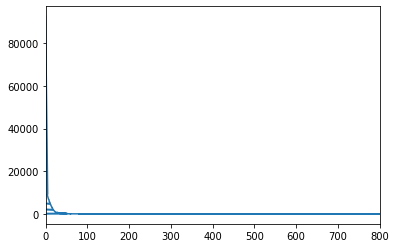

In [45]:
pre_data['Num_of_mix'].value_counts().plot()

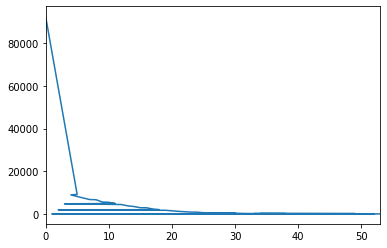

In [46]:
pre_data['Num_of_mix'].value_counts(ascending=False)[0:50].plot()

In [47]:
def mix2(l):
    j = 0
    for i in re.findall(r'.{5}', l):
        j=j+bool(re.search('[a-z]', l))*bool(re.search(r'\d', l))
    if j==0:
        return 0
    elif j<5:
        return 1
    elif j<10:
        return 2
    elif j<20:
        return 3
    return 4

In [48]:
pre_data['Num_of_mix'] = data['url'].apply(mix2)
pre_data['Num_of_mix'].value_counts()

0    92579
2    36052
3    34898
1    16110
4    15159
Name: Num_of_mix, dtype: int64

Count of digits, words and else:

In [50]:
def words(s):
    s = str(s)
    count=0
    for i in s:
        if (ord(i)>=97 and ord(i)<=122) or (ord(i)>=65 and ord(i)<=90):
            count=count+1
    return count

def digits(s):
    s = str(s)
    count=0
    for i in s:
        if ord(i)>=48 and ord(i)<=57:
            count=count+1
    return count

def others(s):
    s = str(s)
    count=0
    for i in s:
        if (ord(i) < 48) or (ord(i) > 57 and ord(i)< 65) or (ord(i) > 90 and ord(i)< 97) or (ord(i) > 122):
            count=count+1
    return count

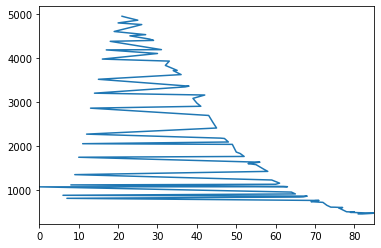

In [54]:
data['url'].apply(words).value_counts(ascending=False)[0:80].plot()

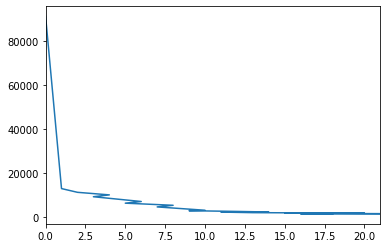

In [61]:
data['url'].apply(digits).value_counts(ascending=False)[0:20].plot()

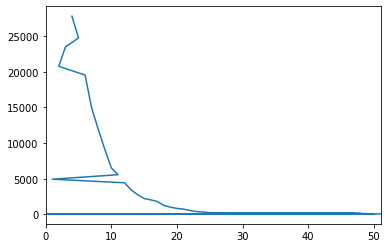

In [62]:
data['url'].apply(others).value_counts(ascending=False)[0:50].plot()

In [63]:
def words2(s):
    s = str(s)
    count=0
    for i in s:
        if (ord(i)>=97 and ord(i)<=122) or (ord(i)>=65 and ord(i)<=90):
            count=count+1
    if count<20:
        return 0
    elif count<40:
        return 1
    elif count<60:
        return 2
    return 3

def digits2(s):
    s = str(s)
    count=0
    for i in s:
        if ord(i)>=48 and ord(i)<=57:
            count=count+1
    if count == 0:
        return 0
    elif count == 1:
        return 1
    elif count == 2:
        return 2
    return 3

def others2(s):
    s = str(s)
    count=0
    for i in s:
        if (ord(i) < 48) or (ord(i) > 57 and ord(i)< 65) or (ord(i) > 90 and ord(i)< 97) or (ord(i) > 122):
            count=count+1
    if count < 5:
        return 0
    elif count < 10:
        return 1
    elif count < 20:
        return 2
    return 3

In [64]:
pre_data['words_count'] = data['url'].apply(words2)
pre_data['digits_count'] = data['url'].apply(digits2)
pre_data['others_count'] = data['url'].apply(others2)

**There are many others festures like:**

1.Although the real domain name is active-userid.com, the attacker tried to make the domain look like paypal.com by adding FreeURL. When users see paypal.com at the beginning of the URL, they can trust the site and connect it, then can share their sensitive information to the this fraudulent site. This is a frequently used method by attackers. Other methods that are often used by attackers are Cybersquatting and Typosquatting.

2.Cybersquatting (also known as domain squatting), is registering, trafficking in, or using a domain name with bad faith intent to profit from the goodwill of a trademark belonging to someone else. The cybersquatter may offer selling the domain to a person or company who owns a trademark contained within the name at an inflated price or may use it for fraudulent purposes such as phishing. For example, the name of your company is “abcompany” and you register as abcompany.com. Then phishers can register abcompany.net, abcompany.org, abcompany.biz and they can use it for fraudulent purpose.

3.Google rank maybe useful for this

However, it's difficult to analysis those feature. It obviously needs using NLP and I can do that for interest after this assessment.

In [65]:
pre_data.head()

,domain_name,address,isMalicious,length,domain_length,file_length,having_at_symbol,having_-_symbol,having___symbol,having_!_symbol,having_ _symbol,having_$_symbol,having_%_symbol,having_&_symbol,Num_of_Sub,having_ip,Num_of_mix,words_count,digits_count,others_count
0,songlyrics.com,news/riffd-the-shins-heartworms,0,2,2,2,0,1,0,0,0,0,0,0,0,0,0,2,0,1
1,imaging-resource.com,PRODS/olympus-e-m1-ii/olympus-e-m1-iiA.HTM,0,3,3,2,0,1,0,0,0,0,0,0,1,0,3,2,2,2
2,gosugamers.net,lol/streams,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,thingiverse.com,corkyzett/collections/intlwomensday,0,2,2,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0
4,bausch.com,our-products/contact-lens-care/specialty-lens-...,0,3,1,2,0,1,0,0,0,0,0,0,0,0,0,3,0,2


# Step -3 :Classification of URLs using sequence model

In [66]:
from keras.models import Sequential
from keras.layers import Dense

In [73]:
dataset = pre_data.values[:,2:20]
dataset

array([[0, 2, 2, ..., 2, 0, 1],
       [0, 3, 3, ..., 2, 2, 2],
       [0, 1, 2, ..., 1, 0, 0],
       ...,
       [1, 5, 3, ..., 3, 3, 3],
       [1, 0, 1, ..., 0, 2, 0],
       [1, 1, 2, ..., 1, 0, 0]], dtype=object)

In [74]:
x=dataset[:,1:18]
y=dataset[:,0]
print(x.shape)
print(y.shape)

(194798, 17)
(194798,)


In [75]:
from sklearn.model_selection import train_test_split

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
print(x_train.shape , x_test.shape)
print(y_train.shape , y_test.shape)

(155838, 17) (38960, 17)
(155838,) (38960,)


In [77]:
# create model
model = Sequential()
model.add(Dense(20, input_dim=17, activation='relu'))
model.add(Dense(17, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [78]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [79]:
model.fit(x, y, epochs=100, batch_size=15)

Epoch 1/100
194798/194798 [==============================] - 22s 115us/step - loss: 0.4967 - accuracy: 0.7599
Epoch 2/100
194798/194798 [==============================] - 22s 113us/step - loss: 0.4726 - accuracy: 0.7752
Epoch 3/100
194798/194798 [==============================] - 24s 121us/step - loss: 0.4662 - accuracy: 0.7789
Epoch 4/100
194798/194798 [==============================] - 27s 140us/step - loss: 0.4634 - accuracy: 0.7813
Epoch 5/100
194798/194798 [==============================] - 28s 143us/step - loss: 0.4607 - accuracy: 0.7819
Epoch 6/100
194798/194798 [==============================] - 27s 141us/step - loss: 0.4589 - accuracy: 0.7821
Epoch 7/100
194798/194798 [==============================] - 27s 140us/step - loss: 0.4576 - accuracy: 0.7837
Epoch 8/100
194798/194798 [==============================] - 27s 141us/step - loss: 0.4567 - accuracy: 0.7839
Epoch 9/100
194798/194798 [==============================] - 28s 146us/step - loss: 0.4554 - accuracy: 0.7850
Epoch 10/1

# Step -4 :Model evaluation

This is the **training** accuracy.

In [80]:
# evaluate the model
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

38960/38960 [==============================] - 1s 19us/step

accuracy: 79.29%


Now we'll extract the predictions and compare the direction of error.

In [81]:
predictions = model.predict(x_test)
rounded = [round(x[0]) for x in predictions]

In [82]:
pd.crosstab(rounded-y_test,columns="Residual")

col_0,Residual
row_0,
-1.0,3491
0.0,30891
1.0,4578
